In [16]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import warnings

warnings.simplefilter("ignore")

**Generate some linear-looking data to test the normal equation. Note: X is a ndarray of shape (100,1) simulating a training set of 100 instances with one feature each. y is a ndarray of shape (100,1) simulating the labels for the 100 training instances. y is a linear-ish model introducing some noise (+ np.random.uniform(1, 5, (100, 1)) to the linear equation (y = ax + b)**

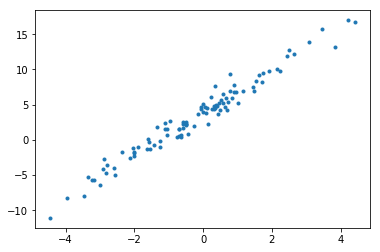

In [17]:
X = 2 * np.random.randn(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)

plt.plot(X, y, ".")
plt.show()

**Normal equation: $\Theta=(X^T*X)^{-1}*X^T*y$**

**The equation gives the value of Theta that minimizes the MSE cost function. Note the inverse of a matrix A noted $A^{-1}$ is a matrix in such a way that $A*A^{-1}=I$ (identity matrix = 1 on the main diagonal and all other elements 0)**

**Add bias X0 = 1 to each instance**

In [18]:
X_b = np.append(np.ones((100, 1)), X, axis=1)
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)

print(f"Parameters vector as determined by the normal equation:{theta_best}")

Parameters vector as determined by the normal equation:[[3.88323508]
 [2.98912288]]


**Use the parameters computed via normal equation to make predictions**

In [19]:
X_new = np.array([[1], [3]])
X_new_b = np.append(np.ones((2, 1)), X_new, axis=1)
y_predict = X_new_b.dot(theta_best)

print(f"Predictions based on parameters computed via normal equation:{y_predict}")

Predictions based on parameters computed via normal equation:[[ 6.87235796]
 [12.85060371]]


**Compute the same using Scikit-Learn and compare - the predictions should be identical!**

In [20]:
lin_reg = LinearRegression()
lin_reg.fit(X, y)
print(f"Predictions done by Scikit-Learn:{lin_reg.predict(X_new)}")

Predictions done by Scikit-Learn:[[ 6.87235796]
 [12.85060371]]


**The Normal Equation gets very slow when the number of features grows large! On the positive side, this equation is linear with regards to the number of instances in the training set (it is O(m)), so it handles large training sets efficiently, provided they can fit in memory.**

**Also, once you have trained your Linear Regression model, predictions are very fast: the computational complexity is linear with regards to both the number of instances you want to make predictions on and the number of features. In other words, making predictions on twice as many instances (or twice as many features) will just take roughly twice as much time.**

**Fit the training set (determine theta best) using Batch Gradient Descent. The result should be the same as normal equation. Batch gradient descent involves computing the partial derivatives of the MSE cost function with respect to each parameter and then the value of the derivatives in point theta (coordinates) at each training step! That is because the derivative of a function determines the slope of the tangent to the function curve in a certain point. Hence these partial derivatives are about determining the slope of the cost function with regards to each axis represented by each model parameter, trying to reach a global minimum for the cost function.**

**For a certain parameter $\theta_j$, the partial derivative (gradient) will be: $\frac{2}{m}*\sum_{i=1}^m (\theta^T*x^{(i)}-y^{(i)})*x_j^{(i)}$ (feature j from instance i)**

**A vector of all these gradients for the whole training set: $\frac{2}{m}*X^T*(X*\theta - y)$**

**This is why the algorithm is called Batch Gradient Descent: it uses the whole batch of training data at every step. As a result it is terribly slow on very large training sets. However, Gradient Descent scales well with the number of features; training a Linear Regression model when there are hundreds of thousands of featuresis much faster using Gradient Descent than using the Normal Equation.**

In [21]:
eta = 0.1  # learning rate
n_iterations = 1000
m = 100

theta = np.random.randn(2, 1)  # random initialization

for iteration in range(n_iterations):
    gradients = 2 / m * X_b.T.dot(X_b.dot(theta) - y)
    theta = theta - eta * gradients

print(f"Parameters vector as determined by Batch Gradient Descent:{theta}")

Parameters vector as determined by Batch Gradient Descent:[[3.88323508]
 [2.98912288]]


**These are precisely the values determined by the normal equation!**

**Batch Gradient Descent is very slow when the training set is large as it uses the whole set on each iteration. Stochastic (Random) Gradient Descent is a similar algorithm but uses a single instance, randomly chosen from the training set, on each iteration, to compute the gradients vector and theta next. It is much faster but less accurate. To avoid bouncing around after finding the best parameters vector that minimizes the MSE function, the eta (learning rate) is gradually reduced in a process called learning schedule. This process is called simulated annealing, because it resembles the process of annealing in metallurgy where molten metal is slowly cooled down. By convention we iterate by rounds of m iterations; each round is called an epoch. While the Batch Gradient Descent code iterated 1,000 times through the whole training set, this code goes through the training set only 50 times and reaches a fairly good solution**

In [22]:
n_epochs = 50

def learning_schedule(t):  # Local function
    t0, t1 = 5, 50
    return t0 / (t + t1)

theta = np.random.randn(2, 1)  # random initialization

for epoch in range(n_epochs):
    for i in range(m):
        random_index = np.random.randint(m)
        xi = np.array([X_b[random_index, ]])
        yi = np.array([y[random_index, ]])
        gradients = 2 * xi.T.dot(xi.dot(theta) - yi)
        eta = learning_schedule(epoch * m + i)  # This will gradually reduce eta on each epoch as i increases and globally as epoch increases
        theta = theta - eta * gradients

print(f"Parameters vector as determined by Stochastic Gradient Descent:{theta}")

Parameters vector as determined by Stochastic Gradient Descent:[[3.88788083]
 [3.01708896]]


**Min-Batch Gradient Descent is a common ground between Batch and Stochastic Gradient Decent algorithms. At each training step will compute the gradients based on a mini batch from the training set**

In [23]:
mini_batch_size = 50
n_iterations = 500
eta = 0.1  # learning rate
theta = np.random.randn(2, 1)  # random initialization

for i in range(n_iterations):
    from_index = np.random.randint(0, 74)
    to_index = from_index + mini_batch_size
    mini_batch_x = X_b[from_index:to_index, :]
    mini_batch_y = y[from_index:to_index, :]
    gradients = 2 / mini_batch_size * mini_batch_x.T.dot(mini_batch_x.dot(theta) - mini_batch_y)
    theta = theta - eta * gradients

print(f"Parameters vector as determined by Mini-Batch Gradient Descent:{theta}")

Parameters vector as determined by Mini-Batch Gradient Descent:[[3.8592836 ]
 [2.98391042]]
